In [1]:
# from src.dirs import MODELHOME, DATAHOME
from src.ml import to_dense, TargetEncoding, stemmer
from src.io import load_artifacts

from joblib import load

from src.dirs import MODELHOME, DATAHOME

rf = load_artifacts(MODELHOME / 'rf')

binner = load(DATAHOME / 'processed' / 'binner.joblib')
rf.keys()

dict_keys(['x_ho', 'x_tr', 'y_ho', 'y_tr', 'x', 'y', 'pipe-tr', 'pipe-fi', 'params'])

## prediction accuracy by site

In [2]:
pipe_tr = rf['pipe-tr']
x_ho = rf['x_ho']
y_ho = rf['y_ho']

pred_ho = pipe_tr.predict(x_ho).reshape(-1, 1)
errors = abs(y_ho - pred_ho)
x_ho.loc[:, 'abs-error'] = errors.values
x_ho.loc[:, 'prediction'] = pred_ho

In [13]:
x_ho.sort_values('abs-error', ascending=False).head(16).loc[:, 'headline']

7122    the ultimate cheat sheet to writing your first...
560     one-sentence truth bombs from people worth pay...
6393                            stop writing to yourself.
3646                          6 reasons why yahoo! failed
6108    4 ways to get high-paying writing workdont sel...
1480                             cryptos watershed moment
945     how i started using baby steps to bring about ...
994           7 things you should never do in the morning
7224    how to become more intelligent (according to e...
1244    im 32 and spent $200k on biohacking. became ca...
867     i meditated for 95 days in a row. heres what h...
5236    why opinions are overrated (even expert opinions)
1448                               hacker product updates
1942              advanced typescript types with examples
558                   10 minimalist habits everyone loves
7321                          12 books that made me think
Name: headline, dtype: object

## Group Errors by Site

In [4]:
site_err = x_ho.groupby('site_id').agg({'abs-error': 'mean', 'binned-class': 'mean'}).sort_values('abs-error')
site_err

,abs-error,binned-class
site_id,,
level-up-web,0.368421,0.394737
free-code-camp,0.625000,3.333333
levelup,0.813187,1.208791
towardsdatascience,0.843750,2.554688
better-programming,0.933962,2.094340
dailyjs,1.000000,1.146341
personal-growth,1.024590,2.934426
swlh,1.041667,2.895833
writingcooperative,1.104839,1.604839


<AxesSubplot:xlabel='binned-class', ylabel='abs-error'>

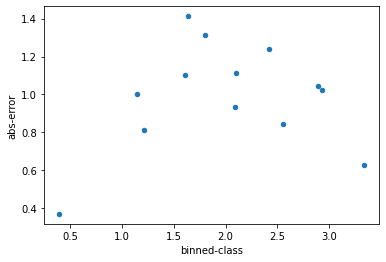

In [5]:
site_err.plot(x='binned-class', y='abs-error', kind='scatter')

## Feature importances

In [6]:
fea = []
for name, tr in pipe_tr.named_steps['features'].named_transformers_.items():
    if name == 'words':
        fea.extend(tr.named_steps['tidf'].get_feature_names())
    elif tr == 'passthrough':
        fea.extend([name])
    elif tr == 'drop':
        pass
    else:
        fea.extend(tr.get_feature_names())

4011
4011


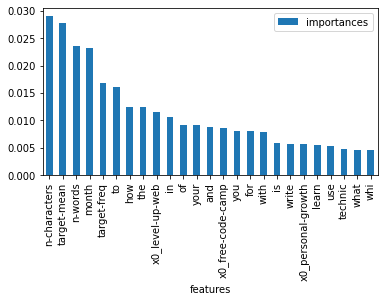

In [7]:
from src.visualize import plot_feature_importances

est = rf['pipe-tr'].named_steps['est']

print(len(fea))
print(len(est.feature_importances_))
f, a = plot_feature_importances(est, fea, n=25)

In [8]:
len(fea) - len(est.feature_importances_)

0